# 7~9월 가격정보 바탕으로 물가변동 확인하기 (판매가격 중심으로)

### **분석 배경**
: 8월 말 ~ 9월 초에 태풍이 한반도를 여러 번 휩쓸고 갔다.`(8호 바비(8/26), 9호 마이삭(9/3), 10호 하이선(9/7))`

  채소값이 폭등했을 것으로 예상하는데 과연 예상이 맞을까? 


### **분석 목표**
   1. 7~9월 상품별 가격 추이 확인
   2. 7~9월 가격변동 비율 분석을 통해 상품군 간 가격 변동에 유의미한 차이가 있는지 비교  
   

### **데이터 출처**
- 한국소비자원 [상품별 가격동향](https://www.price.go.kr/tprice/portal/pricetrend/dailynecessitypricetrend/getGoodTrendSear.do) (437개의 상품)
- 데이터 추출기준 : 조회유형-시점비교, 기간유형-월별, 조회기간-'2020-07'-'2020-08',  '2020-07'-'2020-09' 

## 데이터 불러오기 및 전처리 작업

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


#데이터 불러오기 및 확인
df = pd.read_excel('https://github.com/dsdoris/DS/raw/master/price_200709.xls', index_col='번호')
print(df.info())
print("----------------------------")
print(df['대분류명'].value_counts())
print("----------------------------")
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1 to 437
Data columns (total 11 columns):
상품명        437 non-null object
대분류명       437 non-null object
중분류명       437 non-null object
소분류명       437 non-null object
제조사명       437 non-null object
총용량        437 non-null int64
총용량명       437 non-null object
단위용량       437 non-null int64
단위용량명      437 non-null object
2020-07    437 non-null object
2020-09    437 non-null object
dtypes: int64(2), object(9)
memory usage: 41.0+ KB
None
----------------------------
가공식품     259
일반공산품    130
농축수산물     48
Name: 대분류명, dtype: int64
----------------------------


,상품명,대분류명,중분류명,소분류명,제조사명,총용량,총용량명,단위용량,단위용량명,2020-07,2020-09
번호,,,,,,,,,,,
1,머거본 꿀땅콩(135g),가공식품,곡물가공품,견과류,머거본,135,g,100,g,3048/2258,3080/2282
2,허니버터 아몬드(250g),가공식품,곡물가공품,견과류,길림양행,250,g,100,g,7785/3114,7543/3017
3,샘표소면(1.1kg),가공식품,곡물가공품,국수,샘표,1100,g,100,g,3247/295,3188/290
4,옛날국수소면,가공식품,곡물가공품,국수,오뚜기,900,g,100,g,2561/285,2555/284
5,제일제면소 소면(900g),가공식품,곡물가공품,국수,CJ제일제당,900,g,100,g,2649/294,2766/308
...,...,...,...,...,...,...,...,...,...,...,...
433,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,한국존슨앤존슨,175,g,10,g,12696/725,10642/608
434,해피바스 솝베리 클렌징 폼(175g),일반공산품,이미용품,클렌징폼,아모레퍼시픽,175,g,10,g,9627/550,8921/510
435,Neut.핸드크림,일반공산품,이미용품,핸드로션,한국존슨앤존슨,56,g,10,g,7232/1291,6804/1215


In [2]:
# 추가할 8월 가격정보 데이터프레임 불러오기 및 확인
df2 = pd.read_excel('https://github.com/dsdoris/DS/raw/master/price_200708.xls', index_col='번호')
print(df2.info())
print("----------------------------")
print(df2['대분류명'].value_counts())
print("----------------------------")
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 440
Data columns (total 11 columns):
상품명        440 non-null object
대분류명       440 non-null object
중분류명       440 non-null object
소분류명       440 non-null object
제조사명       440 non-null object
총용량        440 non-null int64
총용량명       440 non-null object
단위용량       440 non-null int64
단위용량명      440 non-null object
2020-07    440 non-null object
2020-08    440 non-null object
dtypes: int64(2), object(9)
memory usage: 41.2+ KB
None
----------------------------
가공식품     259
일반공산품    133
농축수산물     48
Name: 대분류명, dtype: int64
----------------------------


,상품명,대분류명,중분류명,소분류명,제조사명,총용량,총용량명,단위용량,단위용량명,2020-07,2020-08
번호,,,,,,,,,,,
1,머거본 꿀땅콩(135g),가공식품,곡물가공품,견과류,머거본,135,g,100,g,3048/2258,3058/2265
2,허니버터 아몬드(250g),가공식품,곡물가공품,견과류,길림양행,250,g,100,g,7785/3114,7576/3030
3,샘표소면(1.1kg),가공식품,곡물가공품,국수,샘표,1100,g,100,g,3247/295,3214/292
4,옛날국수소면,가공식품,곡물가공품,국수,오뚜기,900,g,100,g,2561/285,2493/277
5,제일제면소 소면(900g),가공식품,곡물가공품,국수,CJ제일제당,900,g,100,g,2649/294,2840/315
...,...,...,...,...,...,...,...,...,...,...,...
436,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,한국존슨앤존슨,175,g,10,g,12696/725,12860/735
437,해피바스 솝베리 클렌징 폼(175g),일반공산품,이미용품,클렌징폼,아모레퍼시픽,175,g,10,g,9627/550,9843/563
438,Neut.핸드크림,일반공산품,이미용품,핸드로션,한국존슨앤존슨,56,g,10,g,7232/1291,7294/1303


In [3]:
# 데이터 프레임 병합 (df, df2)) - 상품명 기준으로 데이터를 합치기
price = pd.merge(df[['상품명','대분류명','중분류명','소분류명','2020-07','2020-09']], df2[['상품명','2020-08']], on='상품명', how='inner')

print(price.shape)
price

(437, 7)


,상품명,대분류명,중분류명,소분류명,2020-07,2020-09,2020-08
0,머거본 꿀땅콩(135g),가공식품,곡물가공품,견과류,3048/2258,3080/2282,3058/2265
1,허니버터 아몬드(250g),가공식품,곡물가공품,견과류,7785/3114,7543/3017,7576/3030
2,샘표소면(1.1kg),가공식품,곡물가공품,국수,3247/295,3188/290,3214/292
3,옛날국수소면,가공식품,곡물가공품,국수,2561/285,2555/284,2493/277
4,제일제면소 소면(900g),가공식품,곡물가공품,국수,2649/294,2766/308,2840/315
...,...,...,...,...,...,...,...
432,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,12696/725,10642/608,12860/735
433,해피바스 솝베리 클렌징 폼(175g),일반공산품,이미용품,클렌징폼,9627/550,8921/510,9843/563
434,Neut.핸드크림,일반공산품,이미용품,핸드로션,7232/1291,6804/1215,7294/1303
435,니베아 SOS 핸드 밤,일반공산품,이미용품,핸드로션,6225/1245,6359/1272,6133/1227


In [4]:
# 월별 판매가격과 단위가격 분리하기

# '/'기준으로 문자열 자르는 함수 만들기 
def split_sellingprice(word):
  if isinstance(word, str):
    return word.split('/')[0]
  else:
    return word

def split_unitprice(word):
  if isinstance(word, str):
    return word.split('/')[1]
  else:
    return word

In [5]:
# 판매가격 데이터프레임 생성
sprice = price[['상품명','대분류명','중분류명','소분류명']]
sprice['7월'] = price['2020-07'].apply(split_sellingprice)
sprice['8월'] = price['2020-08'].apply(split_sellingprice)
sprice['9월'] = price['2020-09'].apply(split_sellingprice)

sprice

C:\Users\Doris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Doris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,상품명,대분류명,중분류명,소분류명,7월,8월,9월
0,머거본 꿀땅콩(135g),가공식품,곡물가공품,견과류,3048,3058,3080
1,허니버터 아몬드(250g),가공식품,곡물가공품,견과류,7785,7576,7543
2,샘표소면(1.1kg),가공식품,곡물가공품,국수,3247,3214,3188
3,옛날국수소면,가공식품,곡물가공품,국수,2561,2493,2555
4,제일제면소 소면(900g),가공식품,곡물가공품,국수,2649,2840,2766
...,...,...,...,...,...,...,...
432,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,12696,12860,10642
433,해피바스 솝베리 클렌징 폼(175g),일반공산품,이미용품,클렌징폼,9627,9843,8921
434,Neut.핸드크림,일반공산품,이미용품,핸드로션,7232,7294,6804
435,니베아 SOS 핸드 밤,일반공산품,이미용품,핸드로션,6225,6133,6359


In [6]:
# 가격정보가 없는 달 확인
print(sprice['7월'].sort_values(ascending=True))
print("----------")
print(sprice['8월'].sort_values(ascending=True))
print("----------")
print(sprice['9월'].sort_values(ascending=True))

418    10054
380    10056
331    10083
411    10090
335    10137
       ...  
236      976
397     9853
218     9870
283      993
386     9992
Name: 7월, Length: 437, dtype: object
----------
273    10073
216    10082
380    10151
412    10239
66      1025
       ...  
331     9755
433     9843
236      989
397     9965
342     9986
Name: 8월, Length: 437, dtype: object
----------
411        -
66      1001
380    10015
335    10074
216    10114
       ...  
326     9770
236      981
273     9825
336     9877
88       998
Name: 9월, Length: 437, dtype: object


In [7]:
# 9월 가격정보 없는 데이터 삭제 (비교불가항목)
sprice=sprice.drop(sprice.loc[sprice['9월']=='-'].index)
print("데이터 행 삭제 확인: (437,7) >>", sprice.shape)

sprice

데이터 행 삭제 확인: (437,7) >> (436, 7)


,상품명,대분류명,중분류명,소분류명,7월,8월,9월
0,머거본 꿀땅콩(135g),가공식품,곡물가공품,견과류,3048,3058,3080
1,허니버터 아몬드(250g),가공식품,곡물가공품,견과류,7785,7576,7543
2,샘표소면(1.1kg),가공식품,곡물가공품,국수,3247,3214,3188
3,옛날국수소면,가공식품,곡물가공품,국수,2561,2493,2555
4,제일제면소 소면(900g),가공식품,곡물가공품,국수,2649,2840,2766
...,...,...,...,...,...,...,...
432,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,12696,12860,10642
433,해피바스 솝베리 클렌징 폼(175g),일반공산품,이미용품,클렌징폼,9627,9843,8921
434,Neut.핸드크림,일반공산품,이미용품,핸드로션,7232,7294,6804
435,니베아 SOS 핸드 밤,일반공산품,이미용품,핸드로션,6225,6133,6359


In [8]:
# 문자열을 int형으로 바꾸는 함수 만들기

def strtoint(word):
  return int(word)

# 가격데이터 문자열에서 int형으로 변환
sprice['7월'] = sprice['7월'].apply(strtoint)
sprice['8월'] = sprice['8월'].apply(strtoint)
sprice['9월'] = sprice['9월'].apply(strtoint)

# 형변환 확인
sprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 436
Data columns (total 7 columns):
상품명     436 non-null object
대분류명    436 non-null object
중분류명    436 non-null object
소분류명    436 non-null object
7월      436 non-null int64
8월      436 non-null int64
9월      436 non-null int64
dtypes: int64(3), object(4)
memory usage: 27.2+ KB


## 가격변동률 확인

In [9]:
# 가격 변동률(7월-9월 인상 또는 하락 비율) 컬럼 생성

sprice['변동률'] = (sprice['9월'] - sprice['7월'])/ sprice['7월'] *100

sprice

,상품명,대분류명,중분류명,소분류명,7월,8월,9월,변동률
0,머거본 꿀땅콩(135g),가공식품,곡물가공품,견과류,3048,3058,3080,1.049869
1,허니버터 아몬드(250g),가공식품,곡물가공품,견과류,7785,7576,7543,-3.108542
2,샘표소면(1.1kg),가공식품,곡물가공품,국수,3247,3214,3188,-1.817062
3,옛날국수소면,가공식품,곡물가공품,국수,2561,2493,2555,-0.234283
4,제일제면소 소면(900g),가공식품,곡물가공품,국수,2649,2840,2766,4.416761
...,...,...,...,...,...,...,...,...
432,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,12696,12860,10642,-16.178324
433,해피바스 솝베리 클렌징 폼(175g),일반공산품,이미용품,클렌징폼,9627,9843,8921,-7.333541
434,Neut.핸드크림,일반공산품,이미용품,핸드로션,7232,7294,6804,-5.918142
435,니베아 SOS 핸드 밤,일반공산품,이미용품,핸드로션,6225,6133,6359,2.152610


In [10]:
# 가격이 하락한 상품군(중분류명)
print(sprice['중분류명'][sprice['변동률']<0].value_counts().sort_values(ascending=False))

print("-------------")

# 가격이 상승한 상품군(중분류명)
print(sprice['중분류명'][sprice['변동률']>0].value_counts().sort_values(ascending=False))

곡물가공품         37
차·음료·주류       33
이미용품          33
세탁·주방·가사용품    26
과자·빙과류        19
조미료·장류·식용유    12
낙농·축산가공품      12
수산가공품          5
의약외품           5
채소             4
정육·난류          4
생선류            2
Name: 중분류명, dtype: int64
-------------
곡물가공품         36
조미료·장류·식용유    32
세탁·주방·가사용품    29
이미용품          27
채소            22
차·음료·주류       21
낙농·축산가공품      19
수산가공품         15
과자·빙과류        10
정육·난류          9
생선류            6
의약외품           2
Name: 중분류명, dtype: int64


In [11]:
# 가격 하락률이 큰 항목 30개
fallprice30 = sprice.sort_values(by='변동률', ascending=True).head(30)

fallprice30

,상품명,대분류명,중분류명,소분류명,7월,8월,9월,변동률
283,고구마(껍질 있는 호박고구마),농축수산물,채소,고구마,993,957,736,-25.881168
432,뉴트로지나 딥클린 포밍 클렌저(175g),일반공산품,이미용품,클렌징폼,12696,12860,10642,-16.178324
282,고구마(껍질 있는 밤고구마),농축수산물,채소,고구마,791,852,676,-14.538559
192,청정원 순창 쌈장,가공식품,조미료·장류·식용유,쌈장,3022,2577,2690,-10.986102
307,듀라셀 울트라 파워체크 AA*2입(피엔지),일반공산품,세탁·주방·가사용품,건전지,3218,2856,2886,-10.316967
390,JB 뉴 베드타임 로션,일반공산품,이미용품,베이비로션,17343,17395,15570,-10.223145
334,홈스타 곰팡이 싹,일반공산품,세탁·주방·가사용품,세정제,4498,4190,4048,-10.004446
387,세이 온더바디 고보습 아이리스,일반공산품,이미용품,바디워시,8349,8059,7547,-9.605941
310,에너자이저AA*2입,일반공산품,세탁·주방·가사용품,건전지,1385,1254,1263,-8.808664
168,샘표 시골집 토장(900g),가공식품,조미료·장류·식용유,된장,9539,9468,8713,-8.659189


In [12]:
print(fallprice30['대분류명'].value_counts().sort_values(ascending=False))
print("-------------")
print(fallprice30['중분류명'].value_counts().sort_values(ascending=False))

일반공산품    18
가공식품      7
농축수산물     5
Name: 대분류명, dtype: int64
-------------
이미용품          11
세탁·주방·가사용품     7
조미료·장류·식용유     3
채소             2
과자·빙과류         2
정육·난류          2
곡물가공품          1
차·음료·주류        1
생선류            1
Name: 중분류명, dtype: int64


In [13]:
# 가격 상승률이 큰 항목 30개
riseprice30 = sprice.sort_values(by='변동률', ascending=False).head(30)
riseprice30

,상품명,대분류명,중분류명,소분류명,7월,8월,9월,변동률
291,배추,농축수산물,채소,배추,4808,6915,8788,82.778702
300,쪽파(흙쪽파),농축수산물,채소,쪽파,637,834,1155,81.318681
290,무(줄기 없는 무),농축수산물,채소,무,2193,2691,3708,69.083447
297,양배추,농축수산물,채소,양배추,2860,3976,4691,64.020979
306,애호박,농축수산물,채소,호박,1458,2830,2391,63.991770
299,오이(백다다기),농축수산물,채소,오이,861,1168,1380,60.278746
284,깻잎,농축수산물,채소,깻잎,1282,1645,2032,58.502340
296,시금치(250~400g),농축수산물,채소,시금치,3020,4443,4753,57.384106
280,가지,농축수산물,채소,가지,352,526,546,55.113636
266,참조기(200~400g),농축수산물,생선류,참조기,1370,1594,2117,54.525547


In [14]:
print(riseprice30['대분류명'].value_counts().sort_values(ascending=False))
print("-------------")
print(riseprice30['중분류명'].value_counts().sort_values(ascending=False))

농축수산물    21
일반공산품     7
가공식품      2
Name: 대분류명, dtype: int64
-------------
채소            17
이미용품           5
생선류            4
세탁·주방·가사용품     2
차·음료·주류        1
곡물가공품          1
Name: 중분류명, dtype: int64


## 데이터 시각화

In [15]:
# import warnings

# warnings.filterwarnings("ignore")
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# # 설정 변환을 위해서 matplotlib만 import
# import matplotlib as mpl

# # Windows
# mpl.rc("font", family='Malgun')

# MacOS
#mpl.rc("font", family='AppleGothic')


# colab인 경우
#!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

Text(0.5, 1.0, 'Price Fluctuation Top 30')

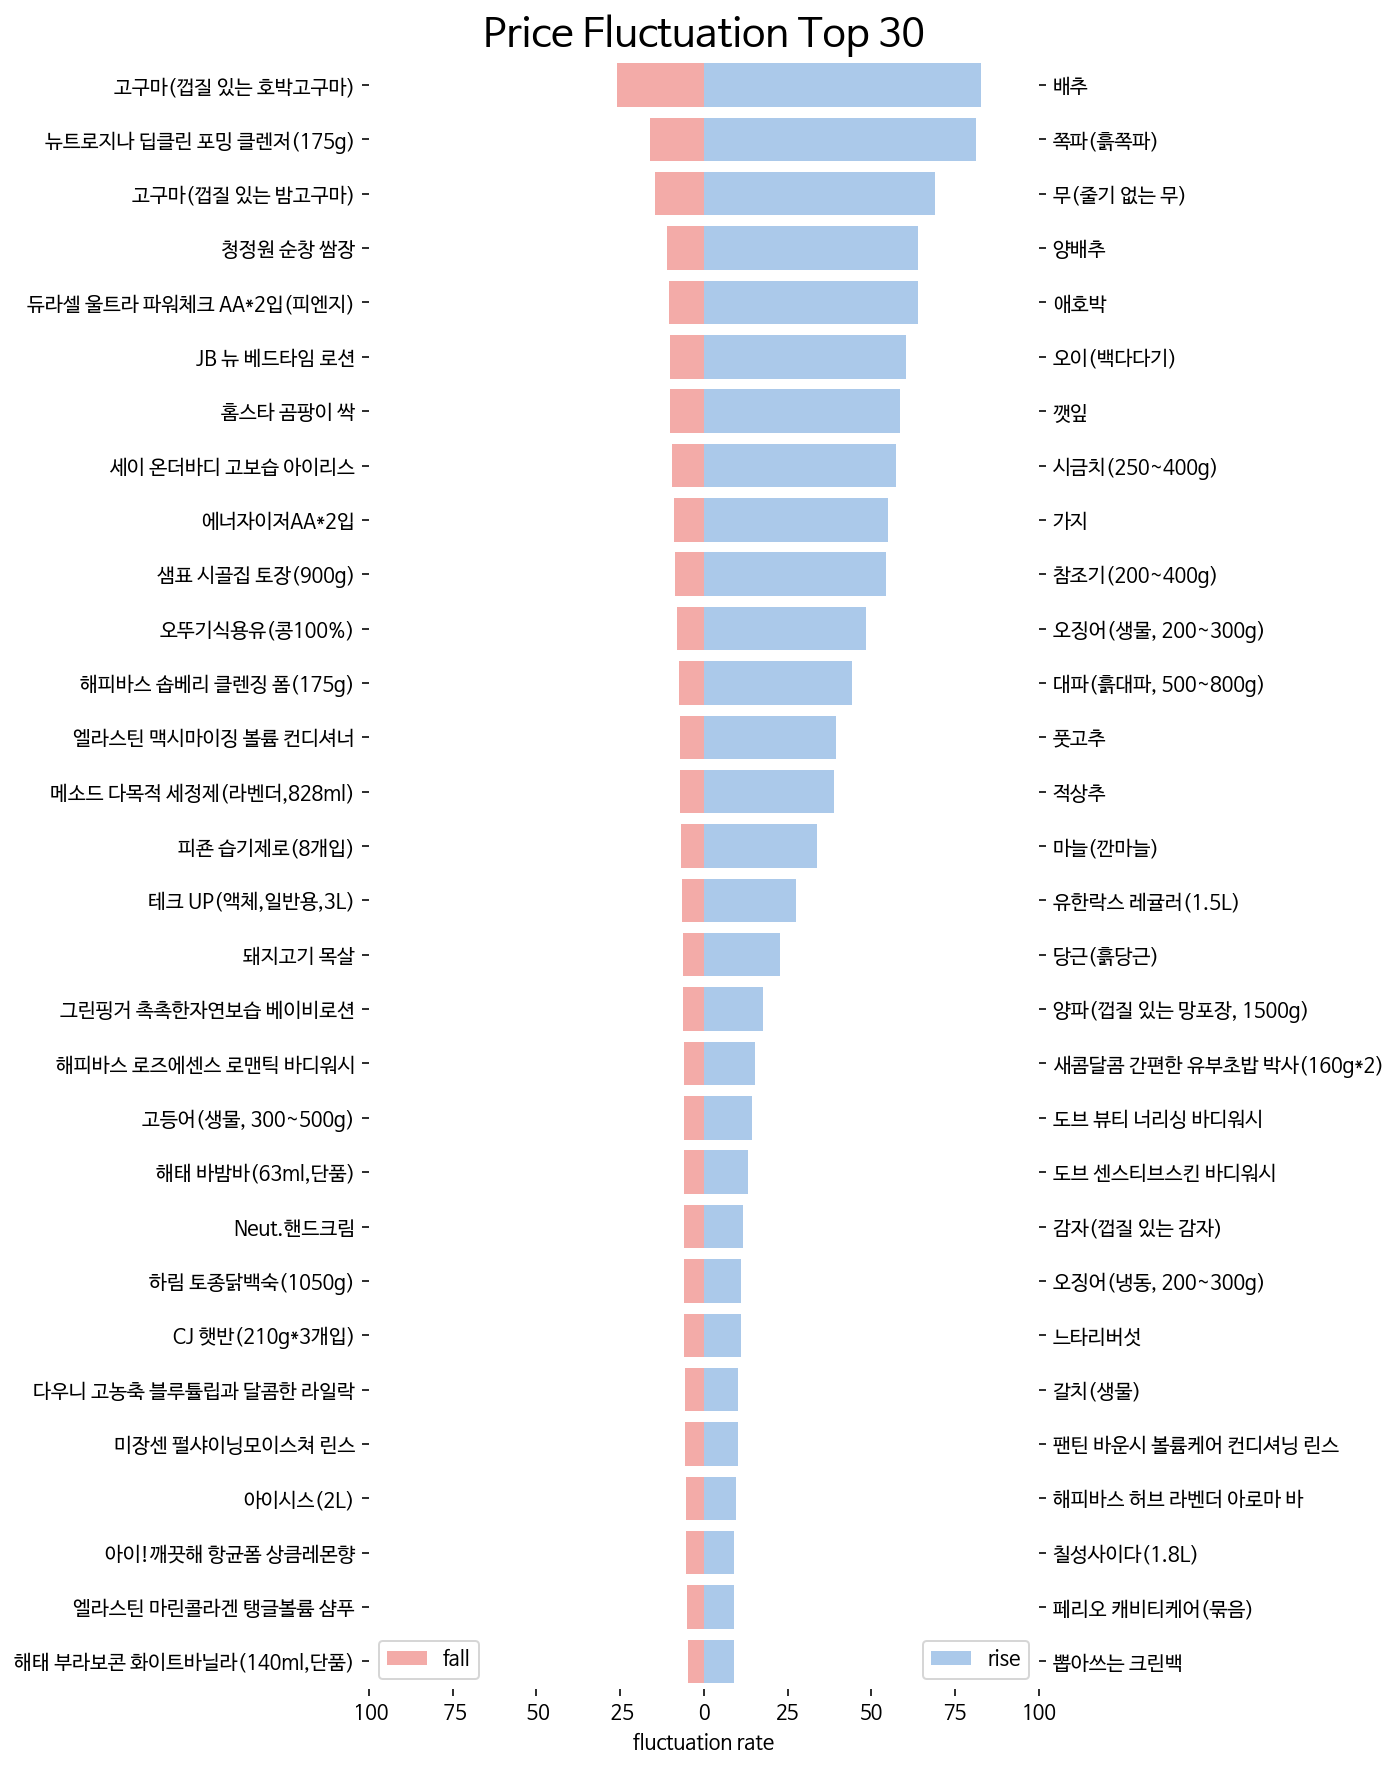

In [26]:
#sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15)) # Initialize the matplotlib figure

# 7~9월 가격 하락률 top30 그래프 그리기
sns.set_color_codes("pastel")
sns.barplot(x="변동률", y="상품명", data=fallprice30,
            label="fall", color="r")

#7~9월 가격 상승률 top30 그래프 그리기
ax2 = ax.twinx()
sns.set_color_codes("pastel")
sns.barplot(x="변동률", y="상품명", data=riseprice30,
            label="rise", color="b")

ax.legend(loc="lower left", frameon=True)
ax2.legend(loc="lower right", frameon=True)

ax.set(xlim=(-100, 100), ylabel="", xlabel="fluctuation rate")
ax2.set(ylabel="")
sns.despine(left=True, bottom=True)
ax.set_title("Price Fluctuation Top 30", size=20)

In [17]:
# 7~9월 상품별 가격 추이 확인

# sns.set_theme(style="whitegrid")
# sns.lineplot(data=sprice[['7월','8월','9월']], palette="tab10", linewidth=2.5)

melt_price = sprice.melt(id_vars='상품명',value_vars=['7월','8월','9월'], var_name='월', value_name='가격')

melt_price = melt_price.merge(sprice[['상품명','대분류명']], how='inner')[['상품명','대분류명','월','가격']]

melt_price
#melt_price.plot.line('월','가격')

,상품명,대분류명,월,가격
0,머거본 꿀땅콩(135g),가공식품,7월,3048
1,머거본 꿀땅콩(135g),가공식품,8월,3058
2,머거본 꿀땅콩(135g),가공식품,9월,3080
3,허니버터 아몬드(250g),가공식품,7월,7785
4,허니버터 아몬드(250g),가공식품,8월,7576
...,...,...,...,...
1303,니베아 SOS 핸드 밤,일반공산품,8월,6133
1304,니베아 SOS 핸드 밤,일반공산품,9월,6359
1305,해피바스 내추럴24핸드크림,일반공산품,7월,7393
1306,해피바스 내추럴24핸드크림,일반공산품,8월,7310


In [18]:
#가격폭 확인하기
sprice.describe()

,7월,8월,9월,변동률
count,436.000000,436.000000,436.000000,436.000000
mean,5659.814220,5660.153670,5700.272936,2.117059
std,5668.816802,5602.423904,5645.175363,11.478539
min,297.000000,303.000000,332.000000,-25.881168
25%,2085.500000,2114.500000,2116.750000,-1.261639
50%,3645.000000,3674.000000,3711.000000,0.090285
75%,7227.500000,7259.000000,7160.250000,1.613049
max,52660.000000,52283.000000,52372.000000,82.778702


[(0, 55000), Text(0, 0.5, 'price'), Text(0.5, 0, 'month')]

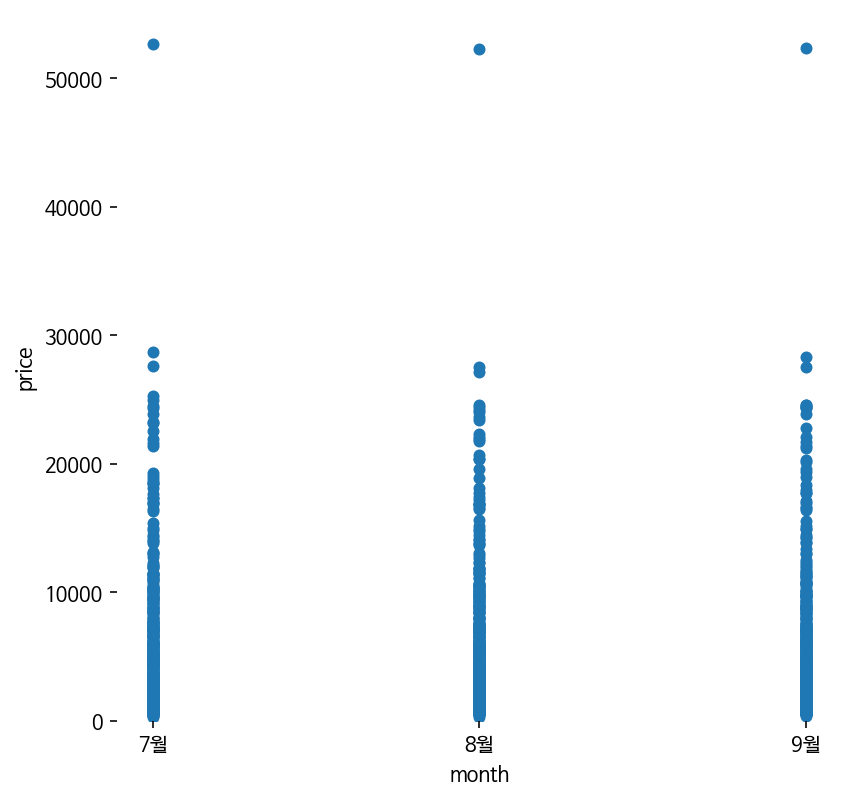

In [19]:
f, ax3 = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="월", y="가격",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=melt_price, ax=ax3, legend=False)
ax3.set(ylim=(0, 55000), ylabel="price",
       xlabel='month')

Text(0.5, 1.0, 'July to September price fluctuation')

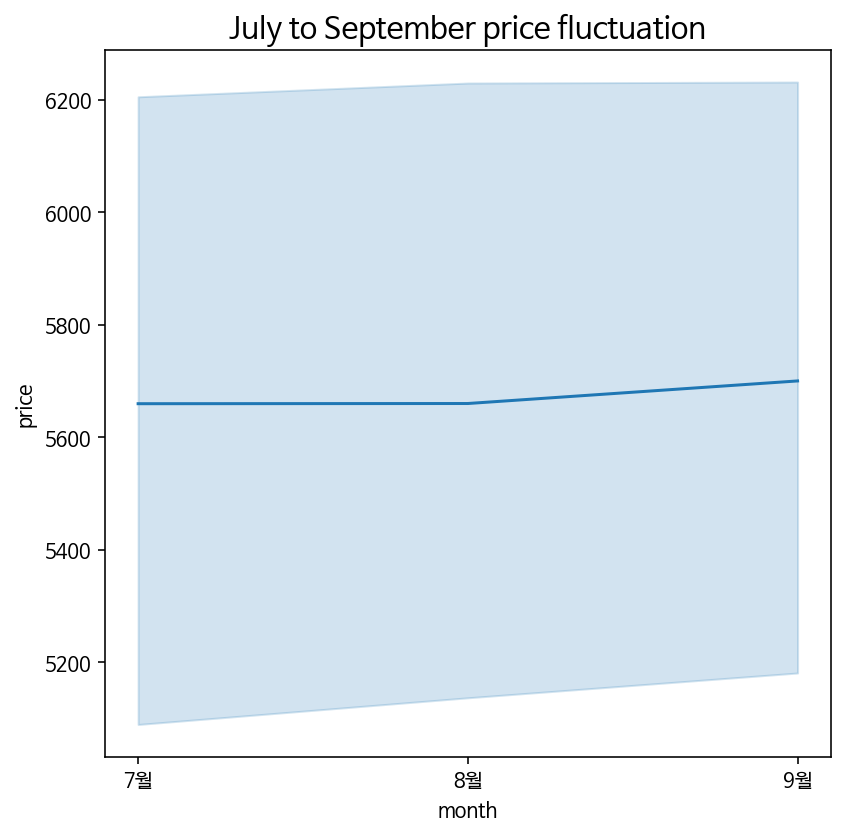

In [20]:
f, ax4 = plt.subplots(figsize=(6.5, 6.5))
sns.lineplot(data=melt_price, x="월", y="가격")
ax4.set(ylabel="price", xlabel='month')
ax4.set_title("July to September price fluctuation", size=15)

## T-Test 시행

상품군(대분류) 별 가격변동률에 차이가 있는지 가설검정 시행

In [21]:
# 상품 분류별 가격변동률 통계치 확인
sprice.groupby(by='대분류명')['변동률'].describe()

,count,mean,std,min,25%,50%,75%,max
대분류명,,,,,,,,
가공식품,259.0,0.053191,2.798751,-10.986102,-0.929356,0.045086,1.049410,15.200430
농축수산물,48.0,19.349071,27.693940,-25.881168,0.322470,7.629907,40.617727,82.778702
일반공산품,129.0,-0.151117,5.020547,-16.178324,-1.952544,0.000000,1.277014,27.390834


In [22]:
# 농축수산물 vs. 일반공산품 가격변동률에 대한 T-test 시행

stats.ttest_ind(sprice['변동률'][sprice['대분류명']=='농축수산물'], sprice['변동률'][sprice['대분류명']=='일반공산품'])

Ttest_indResult(statistic=7.699073906736227, pvalue=9.681607202497376e-13)

>  T값이 약 7.699, P값이 약 9.681e-13으로 '농축수산물과 일반공산품의 가격변동률은 동일하다'라는 귀무가설을 기각하고 대안가설을 채택한다. 따라서, 농축수산물과 일반공산품의 가격변동률이 통계적으로 유의미한 차이가 있다고 할 수 있다.

In [23]:
# 가공식품 vs. 일반공산품 가격변동률에 대한 T-test 시행

stats.ttest_ind(sprice['변동률'][sprice['대분류명']=='가공식품'], sprice['변동률'][sprice['대분류명']=='일반공산품'])

Ttest_indResult(statistic=0.5142086523727103, pvalue=0.6074003765655143)

> T값이 약 0.514, P값이 약 0.60으로 '가공식품과 일반공산품의 가격변동률은 동일하다'라는 귀무가설을 기각할 수 없다.

In [24]:
# 가공식품 vs. 농축수산물 가격변동률에 대한 T-test 시행

stats.ttest_ind(sprice['변동률'][sprice['대분류명']=='가공식품'], sprice['변동률'][sprice['대분류명']=='농축수산물'])

Ttest_indResult(statistic=-10.99099828049758, pvalue=6.777106609320803e-24)

>  T값이 약 -10.99, P값이 약 6.7771e-24으로 '농축수산물과 가공품의 가격변동률은 동일하다'라는 귀무가설을 기각하고 대안가설을 채택한다. 따라서, 농축수산물과 가공품의 가격변동률이 통계적으로 유의미한 차이가 있다고 할 수 있다.

## 에필로그
배추값이 너무 비싸다. 사먹는 김치의 가격은?

In [102]:
sprice[sprice['상품명'].str.contains('김치')]

,상품명,대분류명,중분류명,소분류명,7월,8월,9월,변동률
147,샘표 김치찌개용 꽁치,가공식품,수산가공품,생선통조림,3667,3638,3687,0.545405
303,CJ하선정 포기김치(2.5Kg),농축수산물,채소,포기김치,16342,16526,16400,0.354914
304,동원양반포기김치(2.2kg),농축수산물,채소,포기김치,16431,16506,17070,3.888990
